In [2]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import os
import matplotlib.patches as mpatches

from monai.data import (
    Dataset,
)

from monai.transforms import (
    Compose,
    LoadImaged,
)

import pandas as pd
import collections
from met_brewer import met_brew
from tqdm import tqdm
import glob

%matplotlib inline

In [ ]:
transforms = Compose(
            [
                LoadImaged(keys=["image", "label"]),
                ]
)

In [3]:
data_dir = "/data/Dataset060_Merged_Def/"
train_images = sorted(glob.glob(os.path.join(data_dir, "imagesTr", "s*.nii.gz")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "labelsTr", "s*.nii.gz")))

data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]

totalseg = Dataset(
    data=data_dicts,
    transform=transforms,
)

## Data Analysis

In [3]:
metadata = pd.read_csv('totalseg_metadata_def.csv')

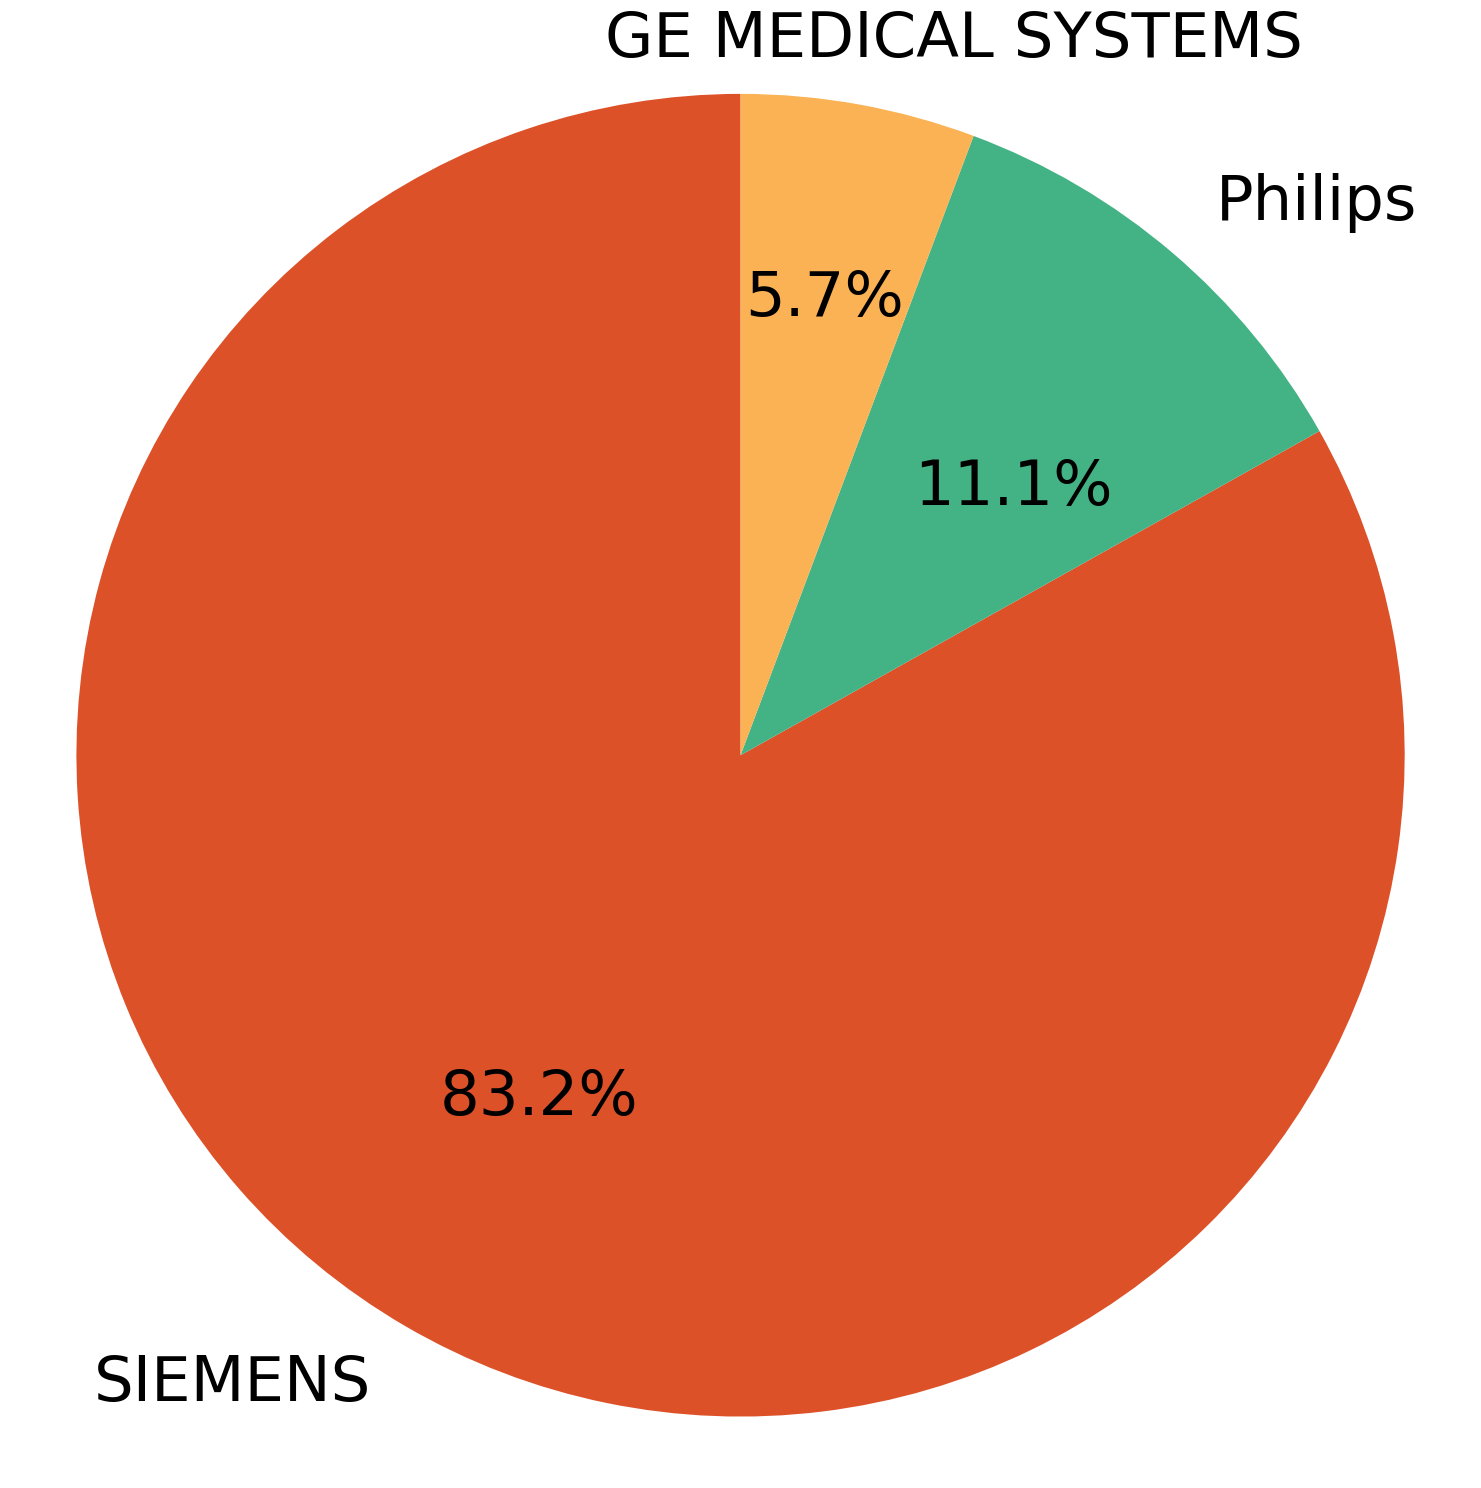

In [10]:
counts = dict(metadata["manufacturer"].value_counts())

colors = met_brew(name="Egypt", n=len(counts), brew_type="colorblind")

plt.figure(figsize=(15, 15))
_, labels, pie = plt.pie(counts.values(), labels=['SIEMENS', 'Philips', 'GE MEDICAL SYSTEMS'], autopct='%1.1f%%', pctdistance=0.6, colors=['#dd5129', '#43b284', '#fab255'], startangle=90, textprops={'weight':'normal', 'fontsize': 45})

labels[2].set_x(np.array(labels[2].get_position())[0]-0.4)

pie[2].set_y(np.array(pie[2].get_position())[1]+0.1)
pie[2].set_x(np.array(pie[2].get_position())[0]+0.02)

pie[1].set_y(np.array(pie[1].get_position())[1]-0.05)
pie[1].set_x(np.array(pie[1].get_position())[0]+0.02)

plt.setp(pie, **{'weight':'normal', 'fontsize':45})
plt.axis('equal')
plt.tight_layout()

plt.show()

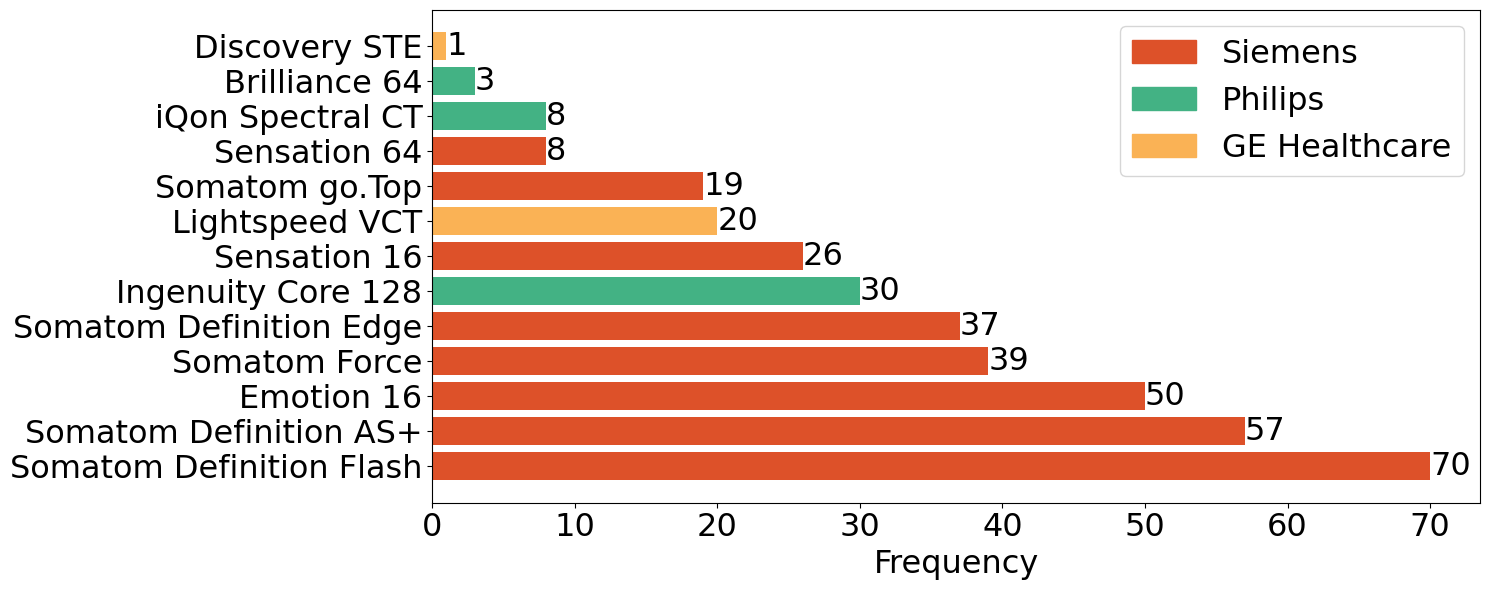

In [9]:
counts = dict(metadata["scanner_model"].value_counts())

fontsize = 23
colors = met_brew(name="Egypt", n=4, brew_type="colorblind")

plt.figure(figsize=(15, 6))
bars = plt.barh(width=counts.values(), y=list(counts.keys()), color=[colors[0], colors[0], colors[0], colors[0], colors[0], colors[2], colors[0], colors[3], colors[0], colors[0], colors[2], colors[2], colors[3]])

legend_handles = [mpatches.Patch(color=colors[0], label='Siemens'),
                  mpatches.Patch(color=colors[2], label='Philips'),
                  mpatches.Patch(color=colors[3], label='GE Healthcare')]

ct_scanner_names = [
    "Discovery STE",
    "Brilliance 64",
    "iQon Spectral CT",
    "Sensation 64",
    "Somatom go.Top",
    "Lightspeed VCT",
    "Sensation 16",
    "Ingenuity Core 128",
    "Somatom Definition Edge",
    "Somatom Force",
    "Emotion 16",
    "Somatom Definition AS+",
    "Somatom Definition Flash"
]

#plt.title('CT Scanner Model Distribution')
plt.bar_label(bars, fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(ticks=range(len(ct_scanner_names)),labels=ct_scanner_names[::-1], fontsize=fontsize)
plt.xlabel('Frequency', fontsize=fontsize)
plt.legend(handles=legend_handles, fontsize=fontsize)
plt.tight_layout()

plt.show()

# STUDY TYPE ANALYSIS

In [18]:
metadata['study_type'].value_counts()

study_type
ct thorax-abdomen-pelvis                  143
ct neck-thorax-abdomen-pelvis             114
ct abdomen-pelvis                          87
ct thorax-neck                             79
ct neck                                    65
ct angiography head                        65
ct pelvis                                  55
ct thorax-abdomen                          54
ct angiography neck-thx-abd-pelvis-leg     50
ct abdomen                                 48
ct polytrauma                              48
ct heart-thorakale aorta                   46
ct spine                                   41
ct  intervention                           40
ct thorax-chest                            39
ct aortic valve                            34
ct heart                                   34
ct angiography pelvis-leg                  17
ct angiography thorax-abdomen-pelvis       17
ct thorax                                  14
ct angiography thorax                      14
ct angiography abdomen-

In [86]:
accepted_scan_type = ['ct thorax-abdomen-pelvis', 'ct neck-thorax-abdomen-pelvis', 'ct abdomen-pelvis', 'ct thorax-abdomen', 'ct angiography neck-thx-abd-pelvis-leg', 'ct abdomen', 'ct abdomen ', 'ct angiography thorax-abdomen-pelvis', 'ct angiography abdomen-pelvis-leg', 'ct polytrauma']

In [34]:
metadata['pathology'].value_counts()

pathology
no_pathology    404
tumor           237
unclear         155
vascular        154
trauma           92
inflammation     86
other            61
bleeding         15
Name: count, dtype: int64